# Analisis exploratorio de datos sobre las acciones de Walmart

In [2]:
#Hay que cargar las librerias
install.packages('dplyr')
library(dplyr)
library(ggplot2) 
library(readxl)
library(ggplot2)

also installing the dependencies 'glue', 'lifecycle', 'rlang', 'pillar'




  There are binary versions available but the source versions are later:
          binary source needs_compilation
glue       1.4.2  1.6.2              TRUE
lifecycle  1.0.0  1.0.1             FALSE
rlang     0.4.11  1.0.2              TRUE
pillar     1.6.0  1.7.0             FALSE
dplyr      1.0.6  1.0.8              TRUE

  Binaries will be installed
package 'glue' successfully unpacked and MD5 sums checked
package 'rlang' successfully unpacked and MD5 sums checked
package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\enriq\AppData\Local\Temp\Rtmp00HQEs\downloaded_packages


installing the source packages 'lifecycle', 'pillar'

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [3]:
wmt<-read.csv("C:\\Users\\enriq\\Downloads\\WMT.csv ",sep=",",header=T)
print('Imprimiremos los primeros 5 elementos del data.frame para ver mas o menos como son nuestros datos')

[1] "Imprimiremos los primeros 5 elementos del data.frame para ver mas o menos como son nuestros datos"


In [4]:
wmt[1:5,]
summary(wmt)
#Como hemos visto, se tratan de precios de las acciones de WALMART en Dolares.

Date,Open,High,Low,Close,Adj.Close,Volume
1972-08-25,0.063477,0.064697,0.063477,0.064453,0.036447,2508800
1972-08-28,0.064453,0.064941,0.064209,0.064209,0.036309,972800
1972-08-29,0.063965,0.063965,0.063477,0.063477,0.035895,1945600
1972-08-30,0.063477,0.063477,0.062988,0.063477,0.035895,409600
1972-08-31,0.062988,0.062988,0.062500,0.062500,0.035343,870400


         Date            Open                High                Low          
 2022-03-07:    2   Min.   :  0.01562   Min.   :  0.01562   Min.   :  0.0144  
 1972-08-25:    1   1st Qu.:  1.38672   1st Qu.:  1.40234   1st Qu.:  1.3750  
 1972-08-28:    1   Median : 16.43750   Median : 16.59375   Median : 16.2500  
 1972-08-29:    1   Mean   : 35.47920   Mean   : 35.81131   Mean   : 35.1513  
 1972-08-30:    1   3rd Qu.: 56.39500   3rd Qu.: 57.00000   3rd Qu.: 55.6650  
 1972-08-31:    1   Max.   :153.60001   Max.   :153.66000   Max.   :151.6600  
 (Other)   :12484                                                             
     Close             Adj.Close             Volume         
 Min.   :  0.01562   Min.   :  0.00889   Min.   :        0  
 1st Qu.:  1.38672   1st Qu.:  0.85832   1st Qu.:  3883600  
 Median : 16.37500   Median : 10.58877   Median :  6312800  
 Mean   : 35.48538   Mean   : 28.94868   Mean   :  7540560  
 3rd Qu.: 56.31625   3rd Qu.: 40.92085   3rd Qu.:  9511400  
 M

In [5]:
sapply(wmt,function(wmt)sum(is.na(wmt))) #No hay ningun valor nulo 
tr<-na.omit(wmt)#Eliminamos las filas donde existe un valor nulo, pero hay varias maneras
#de tratar valores nulos

Date      Open      High       Low     Close Adj.Close    Volume 
        0         0         0         0         0         0         0

In [6]:
tr=tr[-1:-5]
#Solamente analizaremos los precios de cierre y el volumen porque son los unicos
#datos relevantes.

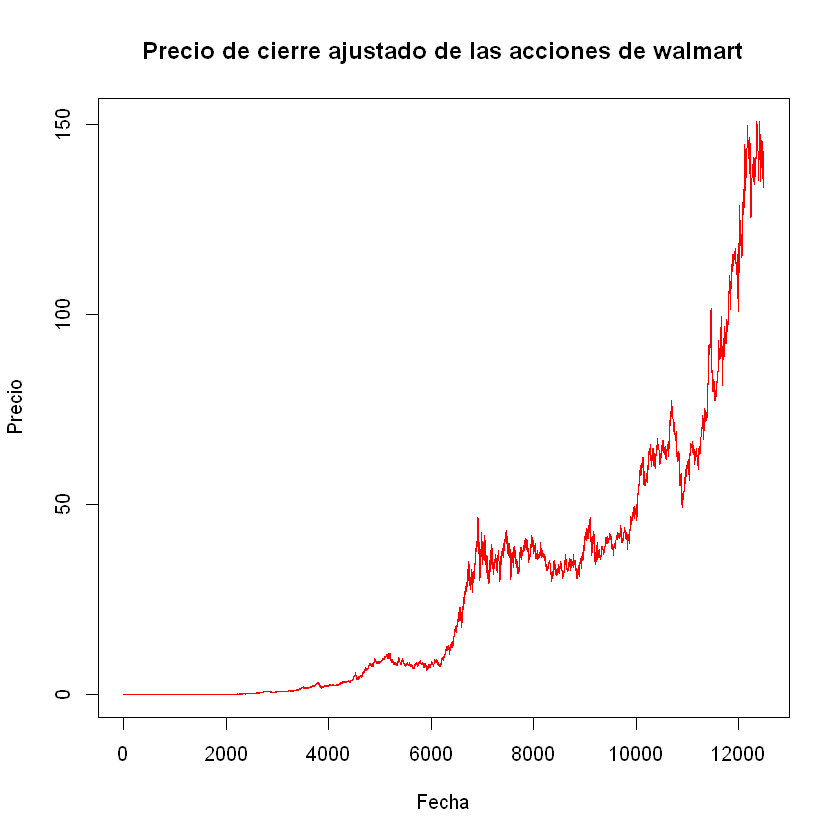

In [7]:
plot(tr$Adj.Close,main='Precio de cierre ajustado de las acciones de walmart',type='l',col='red'
, xlab='Fecha' , ylab='Precio'    )

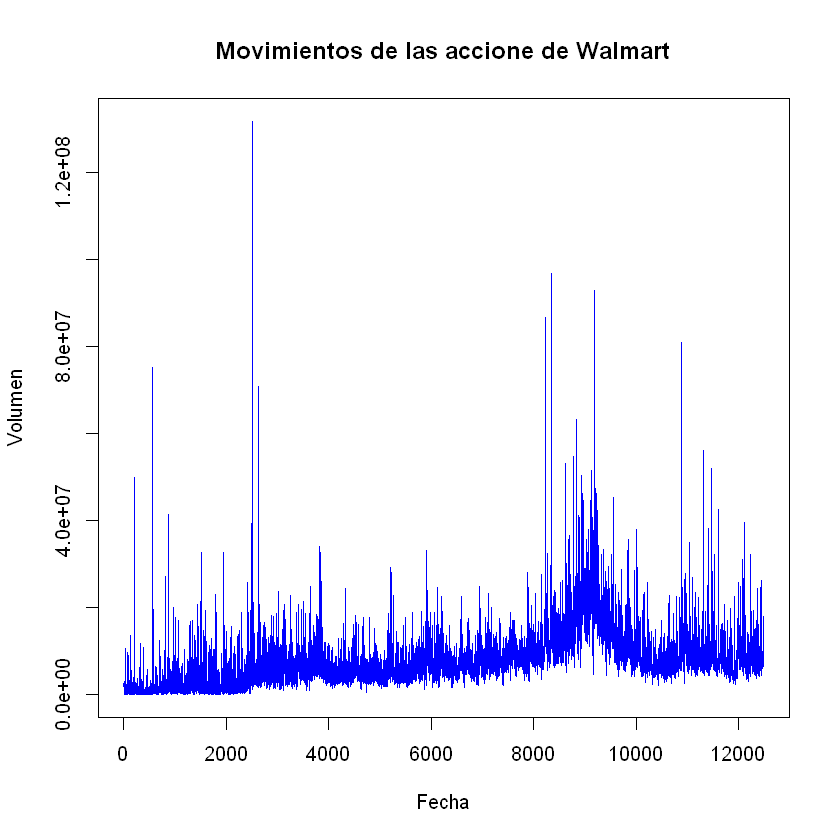

In [8]:
plot(tr$Volume,main='Movimientos de las accione de Walmart',type='l',col='blue'
     , xlab='Fecha' , ylab='Volumen', ylim=c(0,131833600)  )

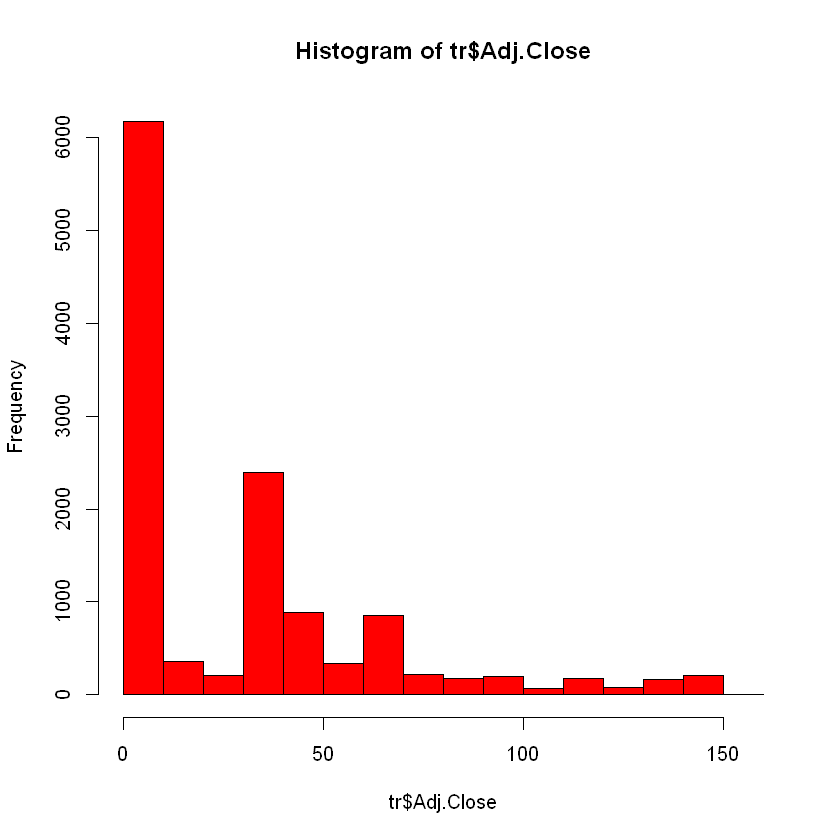

In [9]:
hist(tr$Adj.Close,col='red')

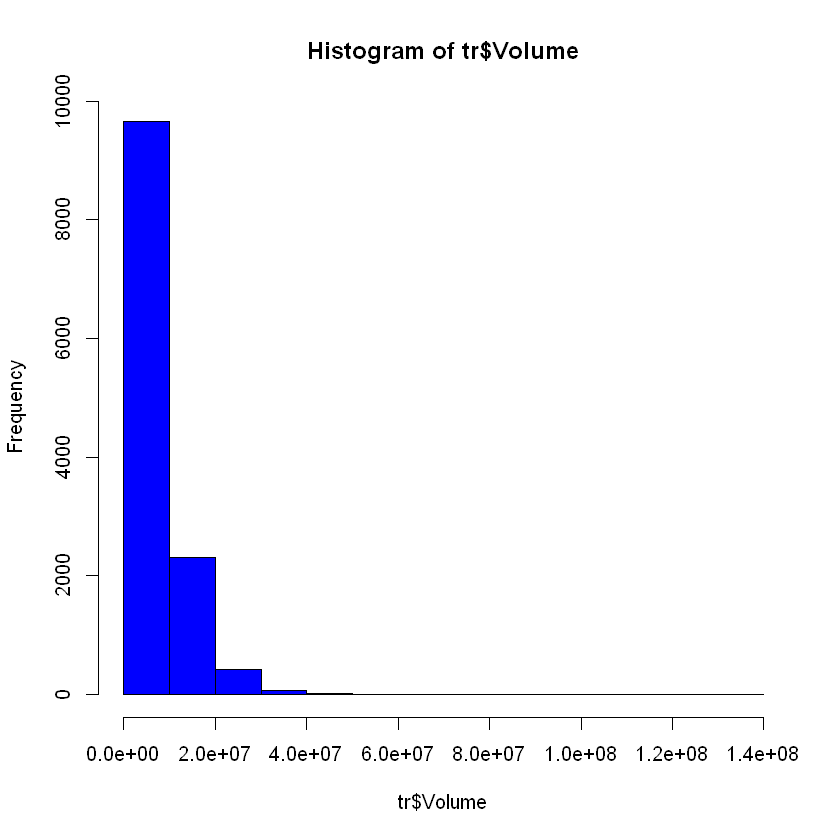

In [10]:
hist(tr$Volume,col='blue')

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


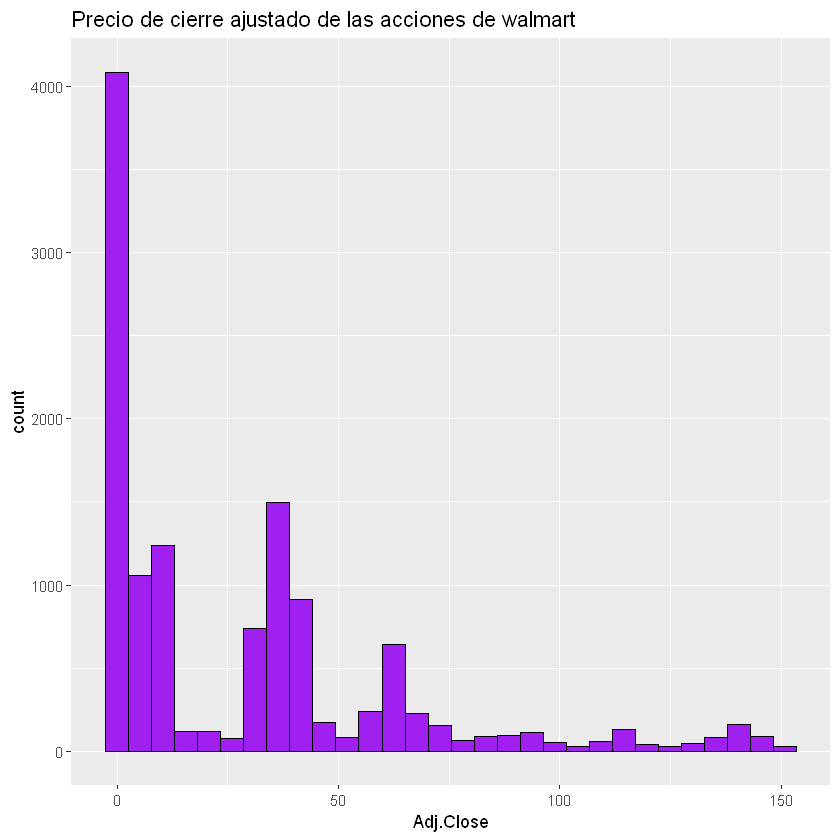

In [11]:
#Para hacer graficos mas bonitos usamos la libreria ggplot 2
histograma <- ggplot(tr, aes(x=Adj.Close)) +
  ggtitle("Precio de cierre ajustado de las acciones de walmart") +
 
  geom_histogram(color="Black", fill="purple")
histograma

In [13]:
#Cargar paquetes para la correlacion
install.packages('GGally')
install.packages('corrplot')
install.packages('PerformanceAnalytics')
library(GGally)
library(corrplot)
library(PerformanceAnalytics)

also installing the dependencies 'ggplot2', 'scales'




  There are binary versions available but the source versions are later:
        binary source needs_compilation
ggplot2  3.3.3  3.3.5             FALSE
GGally   2.1.1  2.1.2             FALSE

package 'scales' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'scales'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\enriq\anaconda3\Lib\R\library\00LOCK\scales\libs\x64\scales.dll  a C:\Users\enriq\anaconda3\Lib\R\library\scales\libs\x64\scales.dll: Permission denied"Warning message:
"restored 'scales'"


The downloaded binary packages are in
	C:\Users\enriq\AppData\Local\Temp\Rtmp00HQEs\downloaded_packages


installing the source packages 'ggplot2', 'GGally'




  There is a binary version available but the source version is later:
         binary source needs_compilation
corrplot   0.88   0.92             FALSE



installing the source package 'corrplot'

also installing the dependency 'quadprog'



package 'quadprog' successfully unpacked and MD5 sums checked
package 'PerformanceAnalytics' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\enriq\AppData\Local\Temp\Rtmp00HQEs\downloaded_packages


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2
corrplot 0.92 loaded
Warning message:
"package 'PerformanceAnalytics' was built under R version 3.6.3"Loading required package: xts
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Attaching package: 'xts'

The following objects are masked from 'package:dplyr':

    first, last


Attaching package: 'PerformanceAnalytics'

The following object is masked from 'package:graphics':

    legend



In [14]:
#Coeficiente de correlacion entre el volumen y los precios de la accion
cor(tr$Adj.Close,tr$Volume )
#Parece ser una correlacion positiva debil
#Debemos recordar que esto estadisticamente no sabemos si es significativa, por lo que utilizaremos
#una prueba de hipotesis para saber si es debil o fuerte
cor.test(tr$Adj.Close,tr$Volume)
#Aqui nos da que la correlacion no es igual a cero, por lo cual la correlacion existe entre
#estas dos variables
#Si queremos analizar la correlacion de varias variables podemos verla en una matriz
round(cor(tr),2) #Quitamos las fechas al no ser un dato numerico, debido a que no es valor numerico
rcorr(as.matrix(tr))#La misma matriz, pero con p value para ver si es significativa

[1] 0.2666339


	Pearson's product-moment correlation

data:  tr$Adj.Close and tr$Volume
t = 30.917, df = 12489, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2502670 0.2828484
sample estimates:
      cor 
0.2666339 


,Adj.Close,Volume
Adj.Close,1.00,0.27
Volume,0.27,1.00


ERROR: Error in rcorr(as.matrix(tr)): no se pudo encontrar la función "rcorr"


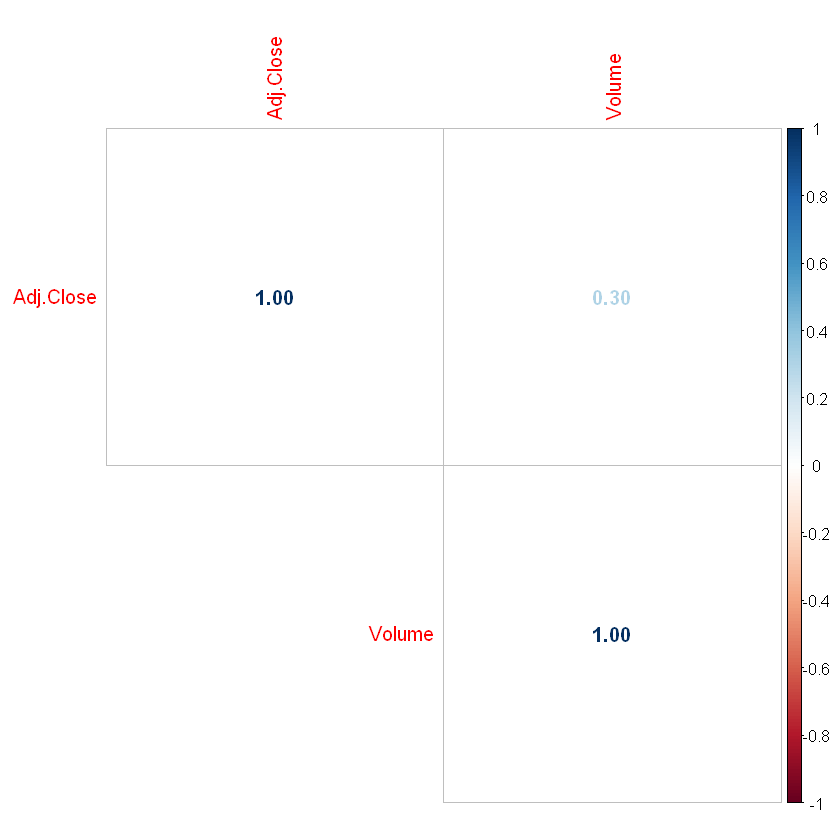

In [15]:
correlacion<-round(cor(tr), 1)

corrplot(correlacion, method="number", type="upper")#Matriz de forma grafica

#También podemos hacer gráficos de dispersión, calcular los coeficientes de una sola vez
#y ver si son estadísticamente significativos, con un solo comando:

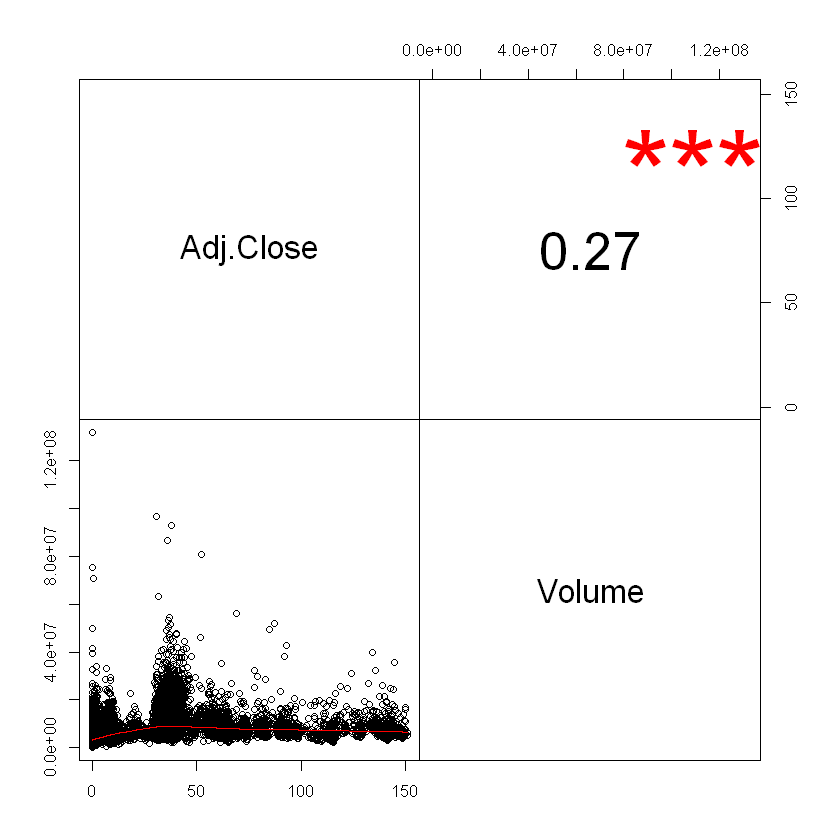

In [16]:
chart.Correlation(tr, histogram = F, pch = 19)
#Conocer la correlacion, nos permite hacer otros analisis como regresiones lineales etc. 
#Se realizaran mas proyectos de este tipo con temas mas avanzados y otras bases de datos.
